---
pagetitle: "DL-2-proj | VG"
title: "Classification of Toxic Comments"
subtitle: "Deep Learning Project"
author: "Vilmantas Gėgžna"
date: 2024-03-12
date-modified: today
date-format: iso
language:
  title-block-modified: "Updated"
fig-align: center
jupyter: python3
embed-resources: true
format:
  html:
    crossrefs-hover: true
    toc: true
    toc_float: true
    toc-location: left
    toc-depth: 4
    number-sections: true
    number-depth: 3
    code-tools: true
    code-fold: show # possible options: false, true, show
    code-line-numbers: true
    html-math-method: mathjax
    link-external-icon: true
    link-external-newwindow: true
    link-external-filter: "(?ds-project|--proj)"
    page-layout: full
crossref:
  chapters: true
  fig-title: "Fig." # (default is "Figure")
  tbl-title: Table # (default is "Table")
  title-delim: . # (default is ":")
editor: # VS Code
  render-on-save: false
---

::: {.content-hidden when-format="html"}

<br><br><br><br><br>

<center>

> **IMPORTANT**
>
> This Jupyter notebook contains the `source code` of the analysis.  
> The analysis is intended to be studied from its rendered HTML document.  
> <span style="color: green;"> Please, **open the HTML** file, </span> which is available at:
>
> ►►► <https://gegznav.github.io/ds-projects/toxic-comments> ◄◄◄
> &nbsp; &nbsp;
>
> ```
> •▲•
> ```

</center>
<br><br><br><br><br><br><br>

:::


<style>
#title-block-header.quarto-title-block.default .quarto-title-meta {
  display: grid;
  grid-template-columns: repeat(3, 1fr);
}

div.sourceCode {
  margin: 0;
}

/* R code indicator */
pre.sourceCode .r {
  border-left: 5px solid #7b97ea;
  border-radius: 0
}
.r .fu {font-weight: bold;}

/* Python code indicator */
pre.sourceCode .python {
  border-left: 5px solid #CFB53B;
  border-radius: 0
}
.python .kw {font-style: italic;}

/* Bash code indicator */
pre.sourceCode .bash {
  border-left: 5px solid #bbb;
  border-radius: 0
}

/* Details sections */
details[open].with-border {
  padding: 1px 5px 1px 5px;
  border-style: solid;
  border-color: grey;
  border-width: 3px;
  border-radius: 5px;
}

/* Tables */
caption, .table-caption {
  text-align: left;
  color: #5a6570;
};

table .dataframe .table-striped thead th {
  text-align: left !important;
}


</style>

::: {.content-hidden when-format="html"}

This cell contains `CSS` code.

:::

<center>

![Toxic Comments Classification project logo. Originally generated with [Leonardo.Ai](https://leonardo.ai/).](<./img/logo%20(LeonardoAI).jpg>){max-width=100%, width=400px}

</center>


# Summary {.unnumbered}

In response to the challenges posed by online abuse and harassment hindering open discourse, a data science project was undertaken to develop an effective moderation system. The project utilized a **DistillBERT**-based model for **multi-label text classification**, leveraging transfer learning techniques for **deep learning**. Built using **PyTorch and Lightning** frameworks, the model was trained on a dataset comprising **223,549 comments**, encompassing both clean (non-toxic) and various forms of toxic content (toxic, severe toxic, obscene, threat, insult, identity hate). Rigorous state-of-the-art procedures were employed to ensure robustness and accuracy. The model achieved a balanced **accuracy** of **0.964** and an **F1 score** of **0.551** on the test set, demonstrating its efficacy in identifying and moderating potentially harmful comments. This project aims to contribute to the creation of safer and more inclusive online communities by facilitating constructive conversations while mitigating the impact of abusive behavior.

***

# Setup

The computations in this project were performed in 2 environments:

- local Windows 10 machine with NVIDIA GTX 950M GPU: 
    - for regular computations and analysis;
    - allows using local tools (e.g., VS Code with its plugins, Quarto, etc.);
    - free of charge.
- Colab Pro environment with either NVIDIA V100 or NVIDIA A100 GPU (depending on which one was available):
    - for resource-demanding computations like training deep learning (DL) models and inference;
    - allows using a powerful GPU;
    - paid service.

The necessary data, log and other files were synchronized via Google Drive. Find the Python-related specifications of each environment in the collapsible sections below. But the main difference was the version of Python and `pandas`.

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border">
<summary>Versions of Python and main libraries: **local** (Windows 10) </summary>

In [ ]:
%load_ext watermark
%watermark --conda
%watermark --python
# Main deep learning packages
%watermark -p torch,torchmetrics,torchinfo,transformers,lightning,tensorboard
# Other main packages
%watermark -p numpy,pandas,matplotlib,seaborn,sklearn,logging

conda environment: TC-M4-proj2

Python implementation: CPython
Python version       : 3.11.8
IPython version      : 8.22.2

torch       : 2.2.1+cu121
torchmetrics: 1.3.1
torchinfo   : 1.8.0
transformers: 4.38.2
lightning   : 2.2.1
tensorboard : 2.16.2



numpy     : 1.26.3
pandas    : 2.2.1
matplotlib: 3.8.3
seaborn   : 0.13.2
sklearn   : 1.4.1.post1
logging   : 0.5.1.2



</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border">
<summary>Versions of Python and main libraries: **Colab** </summary>

```python
%load_ext watermark
%watermark --conda
%watermark --python
# Main deep learning packages
%watermark -p torch,torchmetrics,torchinfo,transformers,lightning,tensorboard
# Other main packages
%watermark -p numpy,pandas,matplotlib,seaborn,sklearn,logging
```

```
conda environment: n/a

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

torch       : 2.2.1
torchmetrics: 1.3.1
torchinfo   : 1.8.0
transformers: 4.38.2
lightning   : 2.2.1
tensorboard : 2.16.2

numpy     : 1.26.3
pandas    : 1.5.3
matplotlib: 3.8.3
seaborn   : 0.13.2
sklearn   : 1.4.1.post1
logging   : 0.5.1.2

```

</details>


::: {.content-hidden when-format="html"}

`</details>`
End of the collapsible section

---

:::

## Colab-Specific Setup

This section describes the setup that was used in the Colab environment. I also installed or updated some packages following the requirements file but not all as updates would break compatibility with other packages required by Colab.

In [ ]:
import os
from google.colab import drive, files

In [ ]:
drive.mount("/content/drive")

In [ ]:
%cd /content/drive/MyDrive/Colab-proj/TC-M4-proj2

/content/drive/MyDrive/Colab-proj/TC-M4-proj2


In [ ]:
!pwd

/content/drive/MyDrive/Colab-proj/TC-M4-proj2


## Main Setup

In [1]:
# | label: setup
# | code-summary: "Code: **The main Python setup**"
# | code-fold: true

# Automatically reload certain modules
%reload_ext autoreload
%autoreload 1

# Plotting
%matplotlib inline

# Packages and modules -------------------------------
# Utilities
import os
import warnings
import numpy as np
import logging
import datetime
import json
from contextlib import contextmanager
from pathlib import Path

# Data frames
import pandas as pd

# EDA and plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# ML: preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    multilabel_confusion_matrix,
    classification_report,
)

# Deep learning
import torch
from torch.utils.data import DataLoader, Dataset

from torchmetrics.classification import Accuracy, F1Score, ConfusionMatrix
from torchinfo import summary

import lightning as L
from lightning.pytorch.loggers import CSVLogger, TensorBoardLogger
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.callbacks import LearningRateMonitor, ModelCheckpoint
from lightning.pytorch import seed_everything

from transformers import AutoModelForSequenceClassification, AutoTokenizer


# Settings --------------------------------------------
# Default plot options
plt.rc("figure", titleweight="bold")
plt.rc("axes", labelweight="bold", titleweight="bold")
plt.rc("font", weight="normal", size=10)
plt.rc("figure", figsize=(10, 3))

# Pandas options
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_colwidth", 50)  # Possible option: None
pd.set_option("display.float_format", lambda x: f"{x:.2f}")
pd.set_option("styler.format.thousands", ",")

# Turn off the scientific notation for floating point numbers.
np.set_printoptions(suppress=True)

# ----------------------------------------------------------------------------

In [2]:
# | code-summary: Function `timestamp()`
# | code-fold: true


def timestamp():
    """Print the current date and time."""
    print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

In [3]:
# | code-summary: Context manager `suppress_certain_logs_and_warnings()`
# | code-fold: true


@contextmanager
def suppress_certain_logs_and_warnings(level=logging.WARNING):
    """Supress certain logging messages and warnings.

    Suppress logging messages from Lightning and PyTorch related to GPU and TPU
    as well as warning related to not using parallel data loading.

    Based on
    https://github.com/Lightning-AI/pytorch-lightning/issues/3431#issuecomment-1527945684
    ```
    logging.getLogger("lightning.pytorch.utilities.rank_zero").setLevel(logging.WARNING)
    disables the following output:
    GPU available: True (cuda), used: True
    TPU available: False, using: 0 TPU cores
    IPU available: False, using: 0 IPUs
    HPU available: False, using: 0 HPUs

    logging.getLogger("lightning.pytorch.accelerators.cuda").setLevel(logging.WARNING)
    disables the following output:
    LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
    ```

    Args:
        level (int): Logging level. Default is `logging.WARNING`.
    """

    log_rank_zero = "lightning.pytorch.utilities.rank_zero"
    log_cuda = "lightning.pytorch.accelerators.cuda"

    try:
        # Save the original log levels
        original_rank_zero_level = logging.getLogger(log_rank_zero).getEffectiveLevel()
        original_cuda_level = logging.getLogger(log_cuda).getEffectiveLevel()

        # Set the desired log levels
        logging.getLogger(log_rank_zero).setLevel(level)
        logging.getLogger(log_cuda).setLevel(level)

        # Suppress warnings
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", ".*does not have many workers.*")
            yield

    finally:
        # Restore the original log levels
        logging.getLogger(log_rank_zero).setLevel(original_rank_zero_level)
        logging.getLogger(log_cuda).setLevel(original_cuda_level)

In [130]:
# | code-summary: Function `style_multilabel_confusion_matrix()`
# | code-fold: true


def style_multilabel_confusion_matrix(ax_, norm=False, precision=None, cmap="Spectral",
                                      label_font_size=None):
    """Style multi-label confusion matrix plots created with
    `torchmetrics.ConfusionMatrix()`.

    Args:
        ax_ (list): List of axes objects.
        norm (bool, optional): Whether to normalize the confusion matrix.
            Default is False.
        precision (int, optional): Number of decimal places for the labels.
        cmap (str, optional): Colormap. Default is "Spectral".
        label_font_size (int, optional): Font size for the labels. Default is None.
    """
    for ax in ax_:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        ax.set_title(ax.get_title().replace("Label", ""))
        # Change cmap to reverse coolwarm
        for im in ax.get_images():
            im.set_cmap(cmap)
            if norm:
                im.set_clim(0, 1)

        # Override text formatting for labels
        for text in ax.texts:
            if precision is not None:
                text.set_text(f"{float(text.get_text()):.{precision}f}")
            if label_font_size is not None:
                text.set_fontsize(label_font_size)

In [5]:
# | code-summary: Function `value_counts_per_column()`
# | code-fold: true


def value_counts_per_column(data, columns):
    """Create value counts for each label (column).
    Function for EDA of multilabel classification problems.

    Args:
        data (pd.DataFrame): Data.
        columns (list): Columns to create value counts for.

    Returns:
        pd.DataFrame: Value counts for each label.
    """
    value_counts_dict = {col: data[col].value_counts() for col in columns}
    df = (
        pd.DataFrame(value_counts_dict)
        .T.reset_index()
        .rename(columns={"index": "↓ label / value →"})
    )

    return df

In [6]:
# | code-summary: Function `create_non_toxic_label()`
# | code-fold: true

toxic_labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
all_labels = ["non_toxic"] + toxic_labels


def create_non_toxic_label(data, toxic_labels):
    """Create label `non_toxic` where all the remaining classes are not present.
    Args:
        data (pd.DataFrame): Data.
        toxic_labels (list): List of toxic labels.
    Returns:
        pd.Series: Label `non_toxic`.
    """
    return data.apply(
        lambda x: 1 if all(x[col] == 0 for col in toxic_labels) else 0, axis=1
    )

In [7]:
# | code-summary: Function `plot_label_counts()`
# | code-fold: true
def plot_label_counts(data, labels, figsize=(10, 5), title="Counts of Each Label"):
    """Plot the counts of each label.
    Args:
        data (pd.DataFrame): Data.
        labels (list): Labels.
        figsize (tuple, optional): Figure size. Default is (10, 5).
        title (str, optional): Title of the plot.
    """
    n = data.shape[0]
    label_counts = data[labels].sum()
    label_counts_sorted = label_counts.sort_values(ascending=True)

    ax = label_counts_sorted.plot(
        kind="barh", ec="black", color=["#ff9999"] * 6 + ["lightblue"]
    )
    for i, v in enumerate(label_counts_sorted):
        ax.text(
            v + 3,
            i,
            f" {v} ({v/n *100:,.1f}%)",
            color="black",
            va="center",
            fontweight="bold",
        )

    toxic_patch = mpatches.Patch(color="#ff9999", ec="black", label="Various Toxic")
    non_toxic_patch = mpatches.Patch(color="lightblue", ec="black", label="Non-Toxic")
    plt.legend(handles=[non_toxic_patch, toxic_patch], loc="lower right")

    ax.set_xlim(right=ax.get_xlim()[1] * 1.15)
    ax.set_xlabel("Count")
    ax.set_ylabel("Comment Type")
    ax.set_title(title)
    return {"ax": ax, "n": n, "label_counts": label_counts}

In [8]:
# | code-summary: Function `tokenize_and_encode()`
# | code-fold: true
def tokenize_and_encode(text, tokenizer, max_tokens=512):
    """Tokenize and encode a text.
    Args:
        text (str): Text to tokenize and encode.
        tokenizer (transformers.AutoTokenizer): Tokenizer.
        max_tokens (int): Maximum number of tokens per sequence. Default is 512.
    Returns:
        dict: Tokenized and encoded text.
    """
    return tokenizer.encode_plus(
        text=text,
        add_special_tokens=True,
        max_length=max_tokens,
        padding="max_length",
        pad_to_max_length=True,
        return_attention_mask=True,
        return_token_type_ids=False,
        truncation=True,
        return_tensors="pt",
    )

In [9]:
# | code-summary: Function `create_trainer()` (wrapper for class Trainer)
# | code-fold: true


def create_trainer(
    log_model_name: str = "model",
    max_epochs: int = 50,
    log_dir: str = "logs/",
    profiler: str | None = "pytorch",
    log_every_n_steps: int = 10,
    save_top_k_models: int = 5,
    monitor_metric: str = "val_loss",
    monitor_mode: str = "min",
    accelerator: str = "gpu",
    devices: list | int = [0],
    precision: int | str = "16-mixed",
    patience: int = 2,
    lr_logging_interval: str | None = False,
    **kwargs
) -> L.Trainer:
    """Create a Trainer object for training a model.

    A wrapper with default settings for the `pytorch_lightning.Trainer` class.

    Args:
        log_model_name (str): Name of the model for logging purposes.
        log_dir (str): Directory to save logs and checkpoints.
        max_epochs (int): Maximum number of epochs.
        profiler (str): Profiler to use. Default is "pytorch".
        log_every_n_steps (int): Log every n-th step. Default is 3.
        save_top_k_models (int): Save top k models. Default is 6.
        monitor (str): Metric to monitor. Default is "val_loss".
        monitor_mode (str): Mode of the monitored metric. Default is "min".
        accelerator (str): Accelerator to use. Default is "gpu".
        devices (list): List of devices to use. Default is [0].
        precision (int | str): Precision to use. Default is "16-mixed".
        patience (int): Patience for Early Stopping. Default is 2.
        lr_logging_interval (str | None | False): Logging interval for
            learning rate. One of "step", "epoch", None or False.
            Default is False (do not log learning rate).
        **kwargs: Additional arguments for the Trainer.

    Returns:
        lightning.Trainer: Trainer object configured with specified settings.
    """

    log_dir = Path(log_dir)
    log_dir.mkdir(parents=True, exist_ok=True)  # Ensure log directory exists

    # Construct the Trainer
    with suppress_certain_logs_and_warnings(logging.WARNING):
        callbacks = [
            EarlyStopping(
                monitor=monitor_metric,
                mode=monitor_mode,
                patience=patience,
                check_finite=True,
            ),
            ModelCheckpoint(
                monitor=monitor_metric,
                mode=monitor_mode,
                filename=log_model_name
                + "--{epoch:03d}--{step:05d}--{val_loss:.2f}--{val_accuracy:.3f}",
                save_top_k=save_top_k_models,
            ),
        ]

        if (lr_logging_interval is None) or (lr_logging_interval is not False):
            callbacks.append(LearningRateMonitor(logging_interval=lr_logging_interval))

        trainer = L.Trainer(
            profiler=profiler,
            max_epochs=max_epochs,
            accelerator=accelerator,
            devices=devices,
            precision=precision,
            default_root_dir=log_dir / "checkpoints/",
            logger=[
                TensorBoardLogger(log_dir / "tensorboard_logs/", name=log_model_name),
                CSVLogger(log_dir / "csv_logs/", name=log_model_name),
            ],
            log_every_n_steps=log_every_n_steps,
            callbacks=callbacks,
            **kwargs
        )

    return trainer

In [10]:
# | code-summary: Function `read_metrics_log()`
# | code-fold: true


def read_metrics_log(
    log_path: str, model_name: str = "", out_format: str = "long"
) -> pd.DataFrame:
    """Read the metrics log file and return a DataFrame.

    The function reads a csv file and extracts the relevant information about
    training and validation metrics, which were tracked.

    In long format (default) returned DataFrame has the following
    columns:
        - epoch (int): Epoch number.
        - set (str): Training or validation set.
        - accuracy (float): balanced accuracy (macro average).
        - f1 (float): F1 score (macro average).
        - loss (float): loss.
        - model (str): Name of the model.

    In wide format returned DataFrame has the following columns:
        - epoch
        - train_accuracy
        - train_f1
        - train_loss
        - val_accuracy
        - val_f1
        - val_loss
        - accuracy_diff (val_accuracy - train_accuracy)
        - f1_diff (val_f1 - train_f1)
        - loss_diff (val_loss - train_loss)
        - model

    Args:
        log_path (str): Path to the log file.
        model_name (str): Name of the model (value for column "model").
            Default is "".
        out_format (str): Output format ("wide" or "long").
            Default is "long".

    Returns:
        pd.DataFrame: DataFrame containing the metrics information.
    """
    df = pd.read_csv(log_path)

    selected_columns = [
        "epoch",
        "train_accuracy",
        "train_f1",
        "train_loss_epoch",
        "val_accuracy",
        "val_f1",
        "val_loss_epoch",
    ]
    df = (
        df[selected_columns]
        .dropna(subset=selected_columns[1:], how="all")
        .astype({"epoch": int})
    )
    df.columns = df.columns.str.replace("_epoch$", "", regex=True)

    if out_format == "wide":
        # Validation and training metrics are logged on separate rows.
        # It is assumed that validation metrics are logged first.
        df = df.sort_values(by=["epoch", "val_loss"], na_position="last")

        first_row_condition = pd.isna(df.train_loss.iloc[0]) and pd.notna(
            df.val_loss.iloc[0]
        )
        second_row_condition = pd.notna(df.train_loss.iloc[1]) and pd.isna(
            df.val_loss.iloc[1]
        )

        if all([first_row_condition, second_row_condition]):
            subset = ["val_accuracy", "val_f1", "val_loss"]
            df[subset] = df[subset].ffill()
            output = (
                df.dropna(subset=["train_loss"])
                .reset_index(drop=True)
                .assign(
                    accuracy_diff=lambda df: df["val_accuracy"] - df["train_accuracy"],
                    f1_diff=lambda df: df["val_f1"] - df["train_f1"],
                    loss_diff=lambda df: df["val_loss"] - df["train_loss"],
                )
            )
        else:
            raise ValueError(
                "The log file is not in the expected format: "
                "there should be 2 rows (for validation and training results) "
                "and every second row in the same epoch must contain NaN values "
                "for the same metric. "
                "Fix the function, the file or use format='long'."
            )

    else:
        # Return long format (default)
        df_melted = pd.melt(
            df, id_vars=["epoch"], var_name="metric", value_name="value"
        ).dropna(subset=["value"])

        df_melted[["set", "metric_type"]] = df_melted["metric"].str.split(
            "_", n=1, expand=True
        )

        df_pivoted = (
            df_melted.pivot(
                index=["epoch", "set"], columns="metric_type", values="value"
            )
            .reset_index()
            .rename(columns={"loss_epoch": "loss"})
            .astype({"epoch": int})
        )
        df_pivoted.columns.name = None
        output = df_pivoted

    return output.assign(model=model_name)

# Exploration and Pre-Processing

::: {.callout-tip}
## Performed locally

The code of the following section was performed **locally** on a Windows 10 machine.

:::

## Dataset

The dataset used in this project is the **Toxic Comment Classification Challenge** [dataset](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge) from Kaggle. It consists of a large number of Wikipedia comments, which have been labeled by human raters for toxic behavior. The types of toxicity are:

- `toxic`
- `severe_toxic`
- `obscene`
- `threat`
- `insult`
- `identity_hate`

During the analysis additional label `non_toxic` will be added.

Data comes in a ZIP archive that contains several CSV files, that were saved in `data/raw` directory: `test.csv`, `test_labels.csv` and `train.csv` will be used in this project.

In [2]:
%%bash
tree data/raw

data/raw
├── README.txt
├── jigsaw-toxic-comment-classification-challenge.zip
├── sample_submission.csv
├── test.csv
├── test_labels.csv
└── train.csv

0 directories, 6 files


## Training and Validation Data

The whole dataset came in several files. The first file `train.csv` contained data that was used for training and validation in this project. The file contained approximately 160,000 comments. [Fig. @fig-comment-counts-train-val] indicates class imbalance. It is seen that multi-row comments have leading and trailing quotes (this will be addressed later). No other issues were found in the data, but a label indicating *non-toxic* comments was added to the dataset.

Correlation and hierarchical clustering analysis results presented in [Fig. @fig-corr-comment-types] suggest that `toxic`, `obscene`, and `insult` labels have the strongest relationships. But this should be investigated in more detail and, unfortunately, this is out of scope for this project.



In [11]:
data_train_val = pd.read_csv("data/raw/train.csv")

In [12]:
data_train_val.shape

(159571, 8)

In [13]:
data_train_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [14]:
data_train_val.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [15]:
data_train_val.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [16]:
data_train_val.isnull().sum().rename("n_missing_values").to_frame()

,n_missing_values
id,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [17]:
data_train_val.duplicated().sum()

0

In [18]:
data_train_val.comment_text.duplicated().sum()

0

In [19]:
data_train_val["non_toxic"] = create_non_toxic_label(data_train_val, toxic_labels)

In [20]:
# Counts of each label
value_counts_per_column(data_train_val, all_labels).style.format(precision=0)

,↓ label / value →,0,1
0,non_toxic,16225,143346
1,toxic,144277,15294
2,severe_toxic,157976,1595
3,obscene,151122,8449
4,threat,159093,478
5,insult,151694,7877
6,identity_hate,158166,1405


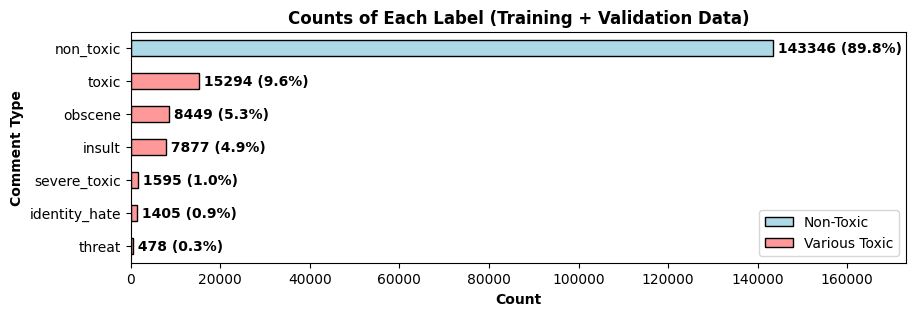

In [21]:
# | label: fig-comment-counts-train-val
# | fig-cap: "Distribution of comment types (labels) in the
# |    *training and validation* data. Each comment can have multiple labels."
# | code-fold: true
plot_label_counts(
    data_train_val,
    all_labels,
    title="Counts of Each Label (Training + Validation Data)",
)
plt.show()

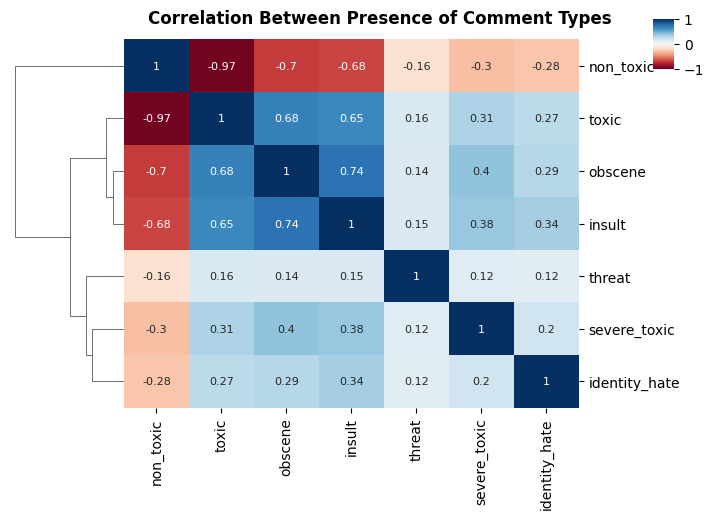

In [22]:
# | label: fig-corr-comment-types
# | fig-cap: Correlation between presence of comment types.
# | code-fold: true

g = sns.clustermap(
    data_train_val[all_labels].corr(),
    method="ward",
    cmap="RdBu",
    annot=True,
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    figsize=(7, 5),
    cbar_pos=(0.94, 0.91, 0.03, 0.1),
    cbar_kws={"location": "right"},
    dendrogram_ratio=(0.2, 0),
)
g.figure.suptitle(
    "Correlation Between Presence of Comment Types",
    fontsize=12,
    y=1.03,
    x=0.55,
)
plt.show()

## Test Data

The test data comes in 2 separate files: `test.csv` and `test_labels.csv`. The first one contains the comments, and in the second one there are the labels for the comments. There were approximately 153,000 comments in the test set but some labels are unknown and are marked with `-1` thus in the testing part only around 64,000 were included. There is the same issue with multi-row comments as in the training data too and the distribution of labels is similar to the training set (see [Fig. @fig-comment-counts-test]).

In [36]:
test_data_raw = pd.read_csv("data/raw/test.csv")
test_labels = pd.read_csv("data/raw/test_labels.csv")

In [37]:
print(
    "---  Size as  (rows, columns)  ---\n"
    f"     Test data:   {test_data_raw.shape}\n"
    f"     Test labels: {test_labels.shape}"
)

---  Size as  (rows, columns)  ---
     Test data:   (153164, 2)
     Test labels: (153164, 7)


In [38]:
test_data_raw.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [39]:
test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [40]:
data_test = pd.merge(test_data_raw, test_labels, on="id")
del test_data_raw, test_labels

print(data_test.shape)

data_test.head()

(153164, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1


In [41]:
# Add `non_toxic` label (column)
data_test["non_toxic"] = create_non_toxic_label(data_test, toxic_labels)

In [42]:
value_counts_per_column(data_test, all_labels).style.format(precision=0)

,↓ label / value →,-1,0,1
0,non_toxic,nan,95429,57735
1,toxic,89186,57888,6090
2,severe_toxic,89186,63611,367
3,obscene,89186,60287,3691
4,threat,89186,63767,211
5,insult,89186,60551,3427
6,identity_hate,89186,63266,712


Value `-1` shows that the comment is unclassified. Comments like this should be **removed**.

In [43]:
# Remove unlabelled data
data_test = data_test.query("toxic != -1")

In [44]:
data_test.shape

(63978, 9)

In [45]:
data_test.isna().sum().rename("n_missing_values").to_frame()

,n_missing_values
id,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0
non_toxic,0


In [46]:
data_test.duplicated().sum()

0

In [47]:
value_counts_per_column(data_test, all_labels).style.format(precision=0)

,↓ label / value →,0,1
0,non_toxic,6243,57735
1,toxic,57888,6090
2,severe_toxic,63611,367
3,obscene,60287,3691
4,threat,63767,211
5,insult,60551,3427
6,identity_hate,63266,712


In [48]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63978 entries, 5 to 153156
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             63978 non-null  object
 1   comment_text   63978 non-null  object
 2   toxic          63978 non-null  int64 
 3   severe_toxic   63978 non-null  int64 
 4   obscene        63978 non-null  int64 
 5   threat         63978 non-null  int64 
 6   insult         63978 non-null  int64 
 7   identity_hate  63978 non-null  int64 
 8   non_toxic      63978 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 4.9+ MB


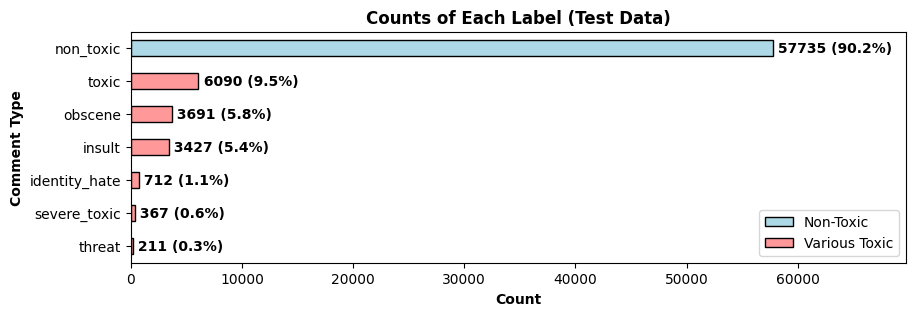

In [49]:
# | label: fig-comment-counts-test
# | fig-cap: "Distribution of comment types (labels) in the *test* data.
# |    Each comment can have multiple labels."
# | code-fold: true
plot_label_counts(data_test, all_labels, title="Counts of Each Label (Test Data)")
plt.show()

## Data Preprocessing: Training, Validation, and Test Sets

First, to evaluate the possibilities of doing a stratified split, the frequencies toxic comment label combinations in the training and validation sets were counted. The results are presented in @tbl-comment-type-combinations.
The combinations "1,1,0,1,1,0" and "1,1,0,1,0,1" appeared only once, so these labels were merged into one group "etc".

The following pre-processing consists of the following steps:

1) Split the `data_train_val` into training and validation sets (80% and 20% respectively) stratified by the combinations of different labels. The training set comes in a different so it is already separated from the main training-validation dataset.
2) Create the `set` column to indicate whether the row is in the training, validation or test set.
3) Bind the training, validation and test sets into a single dataset.
4) Clean the text data:
   - Fix technical artifacts: replace `""` with `"`, and remove `"` from the beginning and the end of the strings with comment text.
   - Strip leading and trailing whitespaces too.
5) Save the pre-processed data to a file.

The sizes of the training, validation and test sets are presented in [Fig. @fig-set-sizes].

In [50]:
# | label: tbl-comment-type-combinations
# | tbl-cap: "The distribution of toxic comment type combinations
# |     in the *training and validation* data. Value `1` indicates presence
# |     and `0` indicates absence of comment types in this particular order:
# |     toxic, severe_toxic, obscene, threat, insult, identity hate."
# | code-fold: true
strata = (
    data_train_val[toxic_labels]
    .apply(lambda x: ",".join(x.astype(str)), axis=1)
    # Merge classes with count 1
    .str.replace("1,1,0,1,1,0", "etc")
    .replace("1,1,0,1,0,1", "etc")
)

(
    strata.value_counts()
    .reset_index()
    .rename({"index": "Comment Type Combination", "count": "Count"}, axis=1)
)

,Comment Type Combination,Count
0,"0,0,0,0,0,0",143346
1,"1,0,0,0,0,0",5666
2,"1,0,1,0,1,0",3800
3,"1,0,1,0,0,0",1758
4,"1,0,0,0,1,0",1215
5,"1,1,1,0,1,0",989
6,"1,0,1,0,1,1",618
7,"0,0,1,0,0,0",317
8,"0,0,0,0,1,0",301
9,"1,1,1,0,1,1",265


In [51]:
# Train-Validation Split
data_train, data_val = train_test_split(
    data_train_val, test_size=0.2, stratify=strata, random_state=42, shuffle=True
)
# Pre-processing
data_merged = pd.concat(
    [
        data_train.assign(set="train"),
        data_val.assign(set="val"),
        data_test.assign(set="test"),
    ],
    ignore_index=True,
).assign(
    comment_text=lambda x: (
        x.comment_text.str.replace('""', '"').str.strip('"').str.strip()
    )
)

In [52]:
data_merged.shape

(223549, 10)

In [53]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223549 entries, 0 to 223548
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             223549 non-null  object
 1   comment_text   223549 non-null  object
 2   toxic          223549 non-null  int64 
 3   severe_toxic   223549 non-null  int64 
 4   obscene        223549 non-null  int64 
 5   threat         223549 non-null  int64 
 6   insult         223549 non-null  int64 
 7   identity_hate  223549 non-null  int64 
 8   non_toxic      223549 non-null  int64 
 9   set            223549 non-null  object
dtypes: int64(7), object(3)
memory usage: 17.1+ MB


In [54]:
data_merged.isna().sum().rename("n_missing_values").to_frame()

,n_missing_values
id,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0
non_toxic,0
set,0


In [55]:
data_merged.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic,set
0,889dc6aa7f451cdb,How to\nI have cleaned up the page and removed...,0,0,0,0,0,0,1,train
1,79ab58d53ce5c227,"Vigor Microlight Deletion\nFor the record, I h...",0,0,0,0,0,0,1,train
2,492f4e1cf8f9d038,Thank you for experimenting with the page Gree...,0,0,0,0,0,0,1,train
3,90d7a062a60f07a3,General problem with naming conventions for WP...,0,0,0,0,0,0,1,train
4,db0345aaa361963b,File:ThTP-2D.jpg listed for deletion \nA file ...,0,0,0,0,0,0,1,train


In [56]:
print(data_merged.iloc[0].comment_text)

How to
I have cleaned up the page and removed whole sections on "How-To". How-Tos are specificaly listed as not being encyclopedic (please see Wikipedia:What Wikipedia is not#Wikipedia is not an indiscriminate collection of information-> Instruction manuals. I took it on my self to add the deleted information to WikiHOW. It can be seen (and edited) at How to Photograph the Night Sky (Astrophotography). Other sections were re-worded to make them more descriptive and less "How-To".


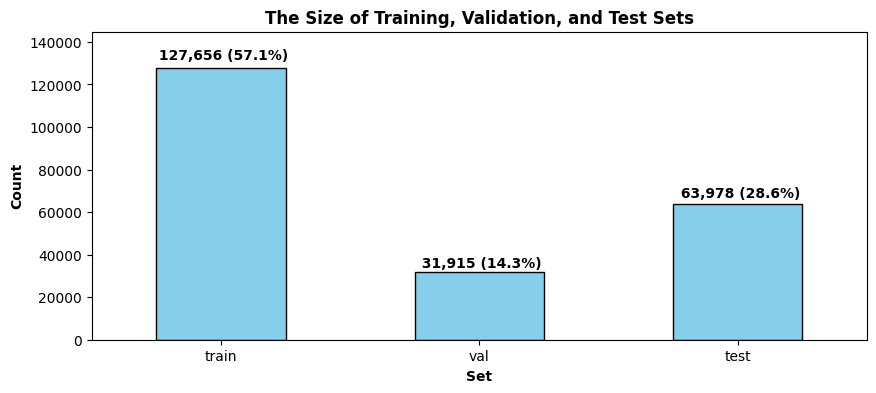

In [57]:
# | label: fig-set-sizes
# | fig-cap: Sizes of the training, validation, and test sets.
# | code-fold: true

set_counts = data_merged.set.value_counts(sort=False)

ax = set_counts.plot(kind="bar", rot=0, color="skyblue", ec="black", figsize=(10, 4))

for i, v in enumerate(set_counts):
    ax.text(
        i,
        v * 1.02,
        f" {v:,} ({v/len(data_merged) *100:.1f}%)",
        color="black",
        va="bottom",
        ha="center",
        fontweight="bold",
    )

ax.set_xlabel("Set")
ax.set_ylabel("Count")
ax.set_ylim(top=ax.get_ylim()[1] * 1.08)
ax.set_title("The Size of Training, Validation, and Test Sets")
plt.show()

Save data to the file.

In [58]:
data_merged.to_csv("data/processed/data_merged.csv", index=False)

# Modeling

::: {.callout-tip}
## Performed on Colab


<img src="https://colab.research.google.com/img/colab_favicon_256px.png" alt="Colab"  width="16" /> This section includes resource-intensive computations that were performed on **Google Colab** with NVIDIA *V100* GPU enabled.

<!-- <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Colab"/> -->

:::

<!--
In Colab with V100 GPU:

```
conda environment: n/a

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

torch       : 2.2.1
torchmetrics: 1.3.1
torchinfo   : 1.8.0
transformers: 4.38.2
lightning   : 2.2.1
tensorboard : 2.16.2

numpy     : 1.26.3
pandas    : 1.5.3
matplotlib: 3.8.3
seaborn   : 0.13.2
sklearn   : 1.4.1.post1
logging   : 0.5.1.2
```

-->

## Model: DistilBERT

Now, the pre-trained DistilBERT model will be loaded and the pre-classifier and classifier (the two last) layers will be prepared for training while the remaining layers will be frozen. 

In [61]:
# | label: model
# Suppress unnecessary messages
logging.getLogger("transformers.modeling_utils").setLevel(logging.ERROR)

# Load pretrained model/tokenizer
pretrained_weights = "distilbert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(pretrained_weights)

# NOTE: AutoModelForSequenceClassification uses BCEWithLogitsLoss
# without weights so we will implement the weighted loss later
model = AutoModelForSequenceClassification.from_pretrained(
    pretrained_weights,
    num_labels=len(all_labels),
    problem_type="multi_label_classification",
)

# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Unfreeze last 2 layers for fine-tuning
for param in model.pre_classifier.parameters():
    param.requires_grad = True

for param in model.classifier.parameters():
    param.requires_grad = True

Model summary and structure:

In [62]:
summary(model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              (23,440,896)
│    │    └─Embedding: 3-2                              (393,216)
│    │    └─LayerNorm: 3-3                              (1,536)
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             (42,527,232)
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           5,383
├─Dropout: 1-4                                          --
Total params: 66,958,855
Trainable params: 595,975
Non-trainable params: 66,362,880

In [63]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

## Lightning and PyTorch Classes

In this section, PyTorch and Lightning classes are defined to make the building blocks for the deep learning part. Some highlights:

1. comments are tokenized at the time when they are loaded by a dataloader;
2. maximum number of tokens is set to 512 (the maximum allowed by DistilBERT);
3. batch size is set to 16:
   - ([here](https://datascience.stackexchange.com/questions/64583/what-are-the-good-parameter-ranges-for-bert-hyperparameters-while-finetuning-it) it was discussed to use either 32 or 16 and [here](https://wandb.ai/jack-morris/david-vs-goliath/reports/Does-Model-Size-Matter-A-Comparison-of-BERT-and-DistilBERT--VmlldzoxMDUxNzU#defining-the-search-space) it was advised to choose between 8, 16, 32, 64, and 128);
4. learning rate is set to $5·10^{-5}$: 
   - (one of the options listed [here](https://datascience.stackexchange.com/questions/64583/what-are-the-good-parameter-ranges-for-bert-hyperparameters-while-finetuning-it) and [here](https://wandb.ai/jack-morris/david-vs-goliath/reports/Does-Model-Size-Matter-A-Comparison-of-BERT-and-DistilBERT--VmlldzoxMDUxNzU#defining-the-search-space));
5. early stopping is used to prevent overfitting:
    - patience is set to 2;
6. *weighted* binary cross-entropy loss is used to address class imbalance;
7. AdamW optimizer is used;
8. alongside *loss*, *balanced accuracy*, and *F1* score, multi-label *confusion matrices* were logged to TensorBoard at each epoch for both training and validation sets.

The details can be found below.

In [64]:
# | code-summary: Class `CommentsDataset` (Dataset)
# | code-fold: show


class CommentsDataset(Dataset):

    def __init__(self, data, tokenizer, max_tokens=512):
        self.data = data
        self.tokenizer = tokenizer
        self.max_tokens = max_tokens

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        comment_text = self.data.iloc[idx]["comment_text"]
        labels = self.data.iloc[idx][all_labels].values

        encoded = tokenize_and_encode(
            comment_text,
            tokenizer=self.tokenizer,
            max_tokens=self.max_tokens,
        )

        return dict(
            comment_text=comment_text,
            input_ids=encoded["input_ids"].squeeze(0),
            attention_mask=encoded["attention_mask"].squeeze(0),
            labels=torch.Tensor(labels.tolist()),
        )

In [65]:
# | code-summary: Class `DataModule` (LightningDataModule)
# | code-fold: show


class DataModule(L.LightningDataModule):

    def __init__(
        self,
        data_dir,
        tokenizer,
        batch_size: int = 16,
        num_workers: int = 0,
        random_state: int = 42,
        train_drop_last_batch: bool = False,
    ) -> None:
        super().__init__()

        # Parameters
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.random_state = random_state
        self.train_drop_last_batch = train_drop_last_batch
        self.tokenizer = tokenizer
        self.data_train = None
        self.data_val = None
        self.data_test = None

    def prepare_data(self) -> None:
        pass

    def setup(self, stage: str = None, limit=False) -> None:
        """Prepare data by creating metadata and splitting into training,
        and test sets.

        Args:
            stage (str): (Not used.)
            limit (int | False): Limit the size (number of rows) of the data.
                `False` means no limit.
        """

        # Create the DataFrame with metadata
        df = pd.read_csv(self.data_dir).fillna({"comment_text": ""})

        self.data_train = df.query("set == 'train'")
        self.data_val = df.query("set == 'val'")
        self.data_test = df.query("set == 'test'")

        if limit:
            self.data_train = self.data_train.head(limit)
            self.data_val = self.data_val.head(limit)
            self.data_test = self.data_test.head(limit)

    def train_dataloader(self) -> DataLoader:
        """Return training data loader."""
        return DataLoader(
            dataset=CommentsDataset(self.data_train, self.tokenizer),
            batch_size=self.batch_size,
            drop_last=self.train_drop_last_batch,
            shuffle=True,
            num_workers=self.num_workers,
        )

    def val_dataloader(self) -> DataLoader:
        """Return validation data loader."""
        return DataLoader(
            dataset=CommentsDataset(self.data_val, self.tokenizer),
            batch_size=self.batch_size,
            drop_last=False,
            shuffle=False,
            num_workers=self.num_workers,
        )

    def test_dataloader(self) -> DataLoader:
        """Return test data loader."""
        return DataLoader(
            dataset=CommentsDataset(self.data_test, self.tokenizer),
            batch_size=self.batch_size,
            drop_last=False,
            shuffle=False,
            num_workers=self.num_workers,
        )

    def predict_dataloader(self, set="test") -> DataLoader:
        """Return data loader for prediction.

        Args:
            set (str): Dataset to use. One of "test" (default), "val", "train".
        """
        if set == "test":
            data = self.data_test
        elif set == "val":
            data = self.data_val
        elif set == "train":
            data = self.data_train
        else:
            raise ValueError(f"Unknown set: {set}")

        return DataLoader(
            dataset=CommentsDataset(data, self.tokenizer),
            batch_size=self.batch_size,
            drop_last=False,
            shuffle=False,
            num_workers=self.num_workers,
        )


data_module = DataModule(
    data_dir="data/processed/data_merged.csv",
    tokenizer=tokenizer,
    batch_size=16,
)
data_module.setup()

Let's calculate **class weights** (weight 1 is for the most common case: non-toxic comments) as the inverse of the class frequencies.

In [66]:
# | label: tbl-class-weights
# | tbl-cap: Class weights for each label based on training set.
# | code-fold: show

inv_label_counts = 1 / data_module.data_train[all_labels].sum()
class_weights = inv_label_counts / min(inv_label_counts)
display(class_weights.rename("Class weights").to_frame().T)
class_weights = torch.tensor(class_weights.values)

,non_toxic,toxic,severe_toxic,obscene,threat,insult,identity_hate
Class weights,1.00,9.37,89.87,16.97,298.64,18.20,102.12


In [67]:
# | code-summary: Class `ClassifierModule` (LightningModule)
# | code-fold: show
class ClassifierModule(L.LightningModule):

    def __init__(self, model, class_weights=None, learning_rate=5e-5, num_classes=7):
        super().__init__()

        self.model = model
        self.save_hyperparameters(ignore=["model"])

        self.task = "multilabel"

        # Accuracy metrics
        self.train_accuracy = Accuracy(
            task=self.task, num_labels=num_classes, average="macro"
        )
        self.val_accuracy = Accuracy(
            task=self.task, num_labels=num_classes, average="macro"
        )
        self.test_accuracy = Accuracy(
            task=self.task, num_labels=num_classes, average="macro"
        )

        self.train_f1 = F1Score(task=self.task, num_labels=num_classes, average="macro")
        self.val_f1 = F1Score(task=self.task, num_labels=num_classes, average="macro")
        self.test_f1 = F1Score(task=self.task, num_labels=num_classes, average="macro")

        self.train_confusion_matrix = ConfusionMatrix(
            task=self.task, num_labels=num_classes, threshold=0.5
        )
        self.train_confusion_matrix_norm = ConfusionMatrix(
            task=self.task, num_labels=num_classes, threshold=0.5, normalize="true"
        )

        self.val_confusion_matrix = ConfusionMatrix(
            task=self.task, num_labels=num_classes, threshold=0.5
        )
        self.val_confusion_matrix_norm = ConfusionMatrix(
            task=self.task, num_labels=num_classes, threshold=0.5, normalize="true"
        )

        # To accumulate results
        self.train_targets = []
        self.train_preds = []

        self.val_targets = []
        self.val_preds = []

    def forward(self, input_ids, attention_mask):
        return self.model(input_ids, attention_mask=attention_mask)

    def _shared_step(self, batch, batch_id, get_loss=True):
        inputs = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        target = batch["labels"]

        # Forward pass
        outputs = self(inputs, attention_mask=attention_mask)

        # Calculate loss (weighted BCE with logits loss)
        if get_loss:
            loss = torch.nn.functional.binary_cross_entropy_with_logits(
                outputs.logits,
                target.float(),
                weight=self.hparams.class_weights.to(target.device),
            )
        else:
            loss = None

        pred = torch.sigmoid(outputs.logits)
        return loss, outputs.logits, pred, target

    def training_step(self, batch, batch_idx):
        loss, logits, pred, target = self._shared_step(batch, batch_idx)

        # Log loss
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True)

        # Save targets and predictions
        self.train_targets.append(target)
        self.train_preds.append(pred)

        # Calculate and log accuracy
        self.train_accuracy(logits, target)
        self.train_f1(logits, target)

        metrics_dict = {
            "train_accuracy": self.train_accuracy,
            "train_f1": self.train_f1,
        }
        self.log_dict(metrics_dict, on_step=False, on_epoch=True, prog_bar=False)

        # Output
        return {"loss": loss, "logits": logits, "pred": pred, "target": target}

    def validation_step(self, batch, batch_idx):
        loss, logits, pred, target = self._shared_step(batch, batch_idx)

        # Log loss
        self.log("val_loss", loss, on_step=True, on_epoch=True, prog_bar=True)

        # Save targets and predictions
        self.val_targets.append(target)
        self.val_preds.append(pred)

        # Calculate and log accuracy
        self.val_accuracy(logits, target)
        self.val_f1(logits, target)

        metrics_dict = {
            "val_accuracy": self.val_accuracy,
            "val_f1": self.val_f1,
        }
        self.log_dict(metrics_dict, on_step=False, on_epoch=True, prog_bar=False)

        # Output
        return {"loss": loss, "logits": logits, "pred": pred, "target": target}

    def test_step(self, batch, batch_idx):
        loss, logits, pred, target = self._shared_step(batch, batch_idx)

        # Log loss
        self.log("test_loss", loss, on_step=True, on_epoch=True, prog_bar=True)

        # Calculate and log accuracy
        self.test_accuracy(logits, target)
        self.test_f1(logits, target)

        metrics_dict = {
            "test_accuracy": self.test_accuracy,
            "test_f1": self.test_f1,
        }
        self.log_dict(metrics_dict, on_step=False, on_epoch=True, prog_bar=False)

        # Output
        return {"loss": loss, "logits": logits, "pred": pred, "target": target}

    def predict_step(self, batch, batch_idx, dataloader_idx=None):
        _, _, pred, target = self._shared_step(batch, batch_idx, get_loss=False)
        return {"pred": pred, "target": target}

    def on_train_epoch_end(self):
        train_targets = torch.cat(self.train_targets)
        train_preds = torch.cat(self.train_preds)

        # Confusion matrix
        self.train_confusion_matrix(train_preds, train_targets.int())
        fig_, ax_ = self.train_confusion_matrix.plot(labels=all_labels)
        style_multilabel_confusion_matrix(ax_)
        self.train_confusion_matrix.reset()
        plt.close(fig_)
        self.loggers[0].experiment.add_figure(
            "train_Confusion matrix (counts)", fig_, self.current_epoch
        )
        del fig_, ax_

        # Confusion matrix (normalized)
        self.train_confusion_matrix_norm(train_preds, train_targets.int())
        fig_, ax_ = self.train_confusion_matrix_norm.plot(labels=all_labels)
        style_multilabel_confusion_matrix(ax_, norm=True)
        self.train_confusion_matrix_norm.reset()
        plt.close(fig_)
        self.loggers[0].experiment.add_figure(
            "train_Confusion matrix (normalized)", fig_, self.current_epoch
        )
        del fig_, ax_
        # Reset
        self.train_targets = []
        self.train_preds = []

    def on_validation_epoch_end(self):
        val_targets = torch.cat(self.val_targets)
        val_preds = torch.cat(self.val_preds)

        # Confusion matrix
        self.val_confusion_matrix(val_preds, val_targets.int())
        fig_, ax_ = self.val_confusion_matrix.plot(labels=all_labels)
        style_multilabel_confusion_matrix(ax_)
        self.val_confusion_matrix.reset()
        plt.close(fig_)
        self.loggers[0].experiment.add_figure(
            "val_Confusion matrix (counts)", fig_, self.current_epoch
        )
        del fig_, ax_

        # Confusion matrix (normalized)
        self.val_confusion_matrix_norm(val_preds, val_targets.int())
        fig_, ax_ = self.val_confusion_matrix_norm.plot(labels=all_labels)
        style_multilabel_confusion_matrix(ax_, norm=True)
        self.val_confusion_matrix_norm.reset()
        plt.close(fig_)
        self.loggers[0].experiment.add_figure(
            "val_Confusion matrix (normalized)", fig_, self.current_epoch
        )
        del fig_, ax_
        # Reset
        self.val_targets = []
        self.val_preds = []

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(
            self.model.parameters(), lr=self.hparams.learning_rate
        )
        return optimizer


bert_model = ClassifierModule(model, class_weights=class_weights)

## Training

Information on GPU used for training:

```python
!nvidia-smi
```
```
Sun Mar 10 12:21:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0              27W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+----------------------+
                                                                                         
+---------------------------------------------------------------------------------------+
| Processes:                                                                            |
|  GPU   GI   CI        PID   Type   Process name                            GPU Memory |
|        ID   ID                                                             Usage      |
|=======================================================================================|
|  No running processes found                                                           |
+---------------------------------------------------------------------------------------+

```

```python
%%time
timestamp()
seed_everything(42)

trainer = create_trainer(
    log_model_name="DistilBERT",
    max_epochs=50,
    log_every_n_steps=20,
    patience=2,
    accelerator="gpu",
    devices=1,
)

res_fit = trainer.fit(model=bert_model, datamodule=data_module)

timestamp()
```

Some of the output generated during the training process:

```
INFO: Seed set to 42
2024-03-10 12:22:22

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:
   | Name                        | Type                                | Params
-------------------------------------------------------------------------------------
0  | model                       | DistilBertForSequenceClassification | 67.0 M
1  | train_accuracy              | MultilabelAccuracy                  | 0     
2  | val_accuracy                | MultilabelAccuracy                  | 0     
3  | test_accuracy               | MultilabelAccuracy                  | 0     
4  | train_f1                    | MultilabelF1Score                   | 0     
5  | val_f1                      | MultilabelF1Score                   | 0     
6  | test_f1                     | MultilabelF1Score                   | 0     
7  | train_confusion_matrix      | MultilabelConfusionMatrix           | 0     
8  | train_confusion_matrix_norm | MultilabelConfusionMatrix           | 0     
9  | val_confusion_matrix        | MultilabelConfusionMatrix           | 0     
10 | val_confusion_matrix_norm   | MultilabelConfusionMatrix           | 0     
-------------------------------------------------------------------------------------
595 K     Trainable params
66.4 M    Non-trainable params
67.0 M    Total params
267.835   Total estimated model params size (MB)

Epoch 11: 100%
 7979/7979 [11:51<00:00, 11.21it/s, v_num=1, train_loss_step=2.350, val_loss_step=2.380, val_loss_epoch=1.600, train_loss_epoch=1.430]
```

<details>
<summary>Profiler Report</summary>


```
INFO: FIT Profiler Report
Profile stats for: records
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                          ProfilerStep*        24.85%      43.210ms        99.99%     173.897ms      86.948ms       0.000us         0.00%      51.865ms      25.933ms             2  
[pl][profile][Strategy]SingleDeviceStrategy.validati...         1.09%       1.892ms        39.08%      67.972ms      33.986ms       0.000us         0.00%      51.824ms      25.912ms             2  
                [pl][profile][_EvaluationLoop].val_next         0.11%     200.000us        34.52%      60.030ms      30.015ms       0.000us         0.00%       0.000us       0.000us             2  
enumerate(DataLoader)#_SingleProcessDataLoaderIter._...        33.73%      58.667ms        34.40%      59.830ms      29.915ms       0.000us         0.00%       0.000us       0.000us             2  
[pl][module]transformers.models.distilbert.modeling_...         0.32%     548.000us        23.81%      41.408ms      20.704ms       0.000us         0.00%      51.289ms      25.645ms             2  
[pl][module]transformers.models.distilbert.modeling_...         0.13%     229.000us        22.84%      39.719ms      19.860ms       0.000us         0.00%      51.196ms      25.598ms             2  
[pl][module]transformers.models.distilbert.modeling_...         0.25%     443.000us        21.78%      37.881ms      18.941ms       0.000us         0.00%      50.739ms      25.369ms             2  
                                               aten::to         0.49%     854.000us        13.03%      22.661ms      61.246us       0.000us         0.00%       7.008ms      18.941us           370  
                                         aten::_to_copy         0.80%       1.400ms        12.84%      22.328ms      91.508us       0.000us         0.00%       8.349ms      34.217us           244  
                                            aten::copy_         1.91%       3.323ms        11.70%      20.341ms      62.781us      14.355ms        27.68%      14.355ms      44.306us           324  
                                           aten::linear         0.81%       1.407ms        11.24%      19.554ms     128.645us       0.000us         0.00%      38.181ms     251.191us           152  
                                  cudaStreamSynchronize         7.87%      13.684ms         7.87%      13.684ms     684.200us       0.000us         0.00%       0.000us       0.000us            20  
[pl][module]transformers.models.distilbert.modeling_...         0.21%     370.000us         4.67%       8.130ms       4.065ms       0.000us         0.00%       8.470ms       4.235ms             2  
                                       cudaLaunchKernel         3.84%       6.670ms         3.84%       6.670ms       8.893us       0.000us         0.00%       0.000us       0.000us           750  
[pl][module]transformers.models.distilbert.modeling_...         0.16%     276.000us         3.41%       5.937ms       2.969ms       0.000us         0.00%       8.443ms       4.221ms             2  
[pl][module]transformers.models.distilbert.modeling_...         0.16%     279.000us         3.39%       5.894ms       2.947ms       0.000us         0.00%       8.407ms       4.204ms             2  
[pl][module]transformers.models.distilbert.modeling_...         0.16%     270.000us         3.37%       5.864ms       2.932ms       0.000us         0.00%       8.457ms       4.229ms             2  
[pl][module]transformers.models.distilbert.modeling_...         0.16%     278.000us         3.36%       5.840ms       2.920ms       0.000us         0.00%       8.482ms       4.241ms             2  
[pl][module]transformers.models.distilbert.modeling_...         0.15%     262.000us         3.32%       5.773ms       2.886ms       0.000us         0.00%       8.480ms       4.240ms             2  
                                           aten::matmul         0.20%     350.000us         3.19%       5.556ms     154.333us       0.000us         0.00%      15.511ms     430.861us            36  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 173.914ms
Self CUDA time total: 51.865ms
```
</details>

```
2024-03-10 14:43:48

CPU times: user 2h 12min 56s, sys: 1min, total: 2h 13min 57s
Wall time: 2h 21min 26s
```

A single epoch took about 9-12 minutes to train part and 2-3 minutes to validate. In total, 12 epochs took about 2 hours and 21 minutes.

# Results

::: {.callout-tip}
## Performed locally

The code in the following section was performed **locally** on a Windows 10 machine.
:::

## Re-Structure Logs

Currently, CSV and TensorBoard logs are stored in different directories which contain subfolders for models and versions. It would be more convenient to have a single folder for each model and different type of logs in it.

Initial structure of `logs` directory:



In [ ]:
%%bash
tree "logs"

logs
├── csv_logs
│   └── DistilBERT
│       └── version_0
│           ├── hparams.yaml
│           └── metrics.csv
└── tensorboard_logs
    └── DistilBERT
        └── version_0
            ├── checkpoints
            │   ├── DistilBERT--epoch=001--step=15958--val_loss=1.74--val_accuracy=0.974.ckpt
            │   ├── DistilBERT--epoch=007--step=63832--val_loss=1.60--val_accuracy=0.975.ckpt
            │   ├── DistilBERT--epoch=008--step=71811--val_loss=1.61--val_accuracy=0.976.ckpt
            │   ├── DistilBERT--epoch=009--step=79790--val_loss=1.58--val_accuracy=0.976.ckpt
            │   ├── DistilBERT--epoch=010--step=87769--val_loss=1.60--val_accuracy=0.976.ckpt
            │   └── DistilBERT--epoch=011--step=95748--val_loss=1.60--val_accuracy=0.976.ckpt
            ├── events.out.tfevents.1710073354.db23b82b7acd.8758.0
            ├── fit-[Strategy]SingleDeviceStrategy.training_step.1710073362155335607.pt.trace.json
            ├── fit-[Strategy]SingleDeviceStrategy.validation_st

<!-- 
```
logs
├── csv_logs
│   └── DistilBERT
│       └── version_0
│           ├── hparams.yaml
│           └── metrics.csv
└── tensorboard_logs
    └── DistilBERT
        └── version_0
            ├── checkpoints
            │   ├── DistilBERT--epoch=001--step=15958--val_loss=1.74--val_accuracy=0.974.ckpt
            │   ├── DistilBERT--epoch=007--step=63832--val_loss=1.60--val_accuracy=0.975.ckpt
            │   ├── DistilBERT--epoch=008--step=71811--val_loss=1.61--val_accuracy=0.976.ckpt
            │   ├── DistilBERT--epoch=009--step=79790--val_loss=1.58--val_accuracy=0.976.ckpt
            │   ├── DistilBERT--epoch=010--step=87769--val_loss=1.60--val_accuracy=0.976.ckpt
            │   └── DistilBERT--epoch=011--step=95748--val_loss=1.60--val_accuracy=0.976.ckpt
            ├── events.out.tfevents.1710073354.db23b82b7acd.8758.0
            ├── fit-[Strategy]SingleDeviceStrategy.training_step.1710073362155335607.pt.trace.json
            ├── fit-[Strategy]SingleDeviceStrategy.validation_step.1710073901901402081.pt.trace.json
            └── hparams.yaml

7 directories, 12 files
```
-->

In [ ]:
%%bash

root_dir="logs" # Without trailing slash

logger=("tensorboard_logs" "tensorboard_logs" "csv_logs")
subdir=("checkpoints/" "" "")
log_type=("checkpoints" "tensorboard_logs" "csv_logs")

# Read model names (based on the contents of csv_logs directory only)
readarray -t models < \
    <(find "$root_dir/csv_logs" -mindepth 1 -maxdepth 1 -type d -printf "%f\n" | sort -u)

# Iterate over each model and find versions
for model in "${models[@]}"; do
    echo " "
    echo "=== Model: $model ==="
    versions=$(find "$root_dir/csv_logs/$model" -mindepth 1 -maxdepth 1 -type d -printf "%f\n")
    for version in $versions; do
        echo " "
        echo "--- $version ---"

        # Loop through directories
        for ((i=0; i<${#logger[@]}; i++)); do
            from="$root_dir/${logger[i]}/$model/$version/${subdir[i]}"
            to="$root_dir/$model/$version/${log_type[i]}/"
            echo "    $from -> $to"
            mkdir -p "$to" # Create dir if it doesn't exist
            mv "$from"* "$to"
        done
    done
done

# Delete empty directories recursively
find "$root_dir" -type d -empty -delete

 
=== Model: DistilBERT ===
 
--- version_0 ---
    logs/tensorboard_logs/DistilBERT/version_0/checkpoints/ -> logs/DistilBERT/version_0/checkpoints/
    logs/tensorboard_logs/DistilBERT/version_0/ -> logs/DistilBERT/version_0/tensorboard_logs/
    logs/csv_logs/DistilBERT/version_0/ -> logs/DistilBERT/version_0/csv_logs/


<!-- 
```
=== Model: DistilBERT ===
 
--- version_0 ---
    logs/tensorboard_logs/DistilBERT/version_0/checkpoints/ -> logs/DistilBERT/version_0/checkpoints/
    logs/tensorboard_logs/DistilBERT/version_0/ -> logs/DistilBERT/version_0/tensorboard_logs/
    logs/csv_logs/DistilBERT/version_0/ -> logs/DistilBERT/version_0/csv_logs/
```
-->

After restructuring:

In [ ]:
%%bash
tree "logs"

logs
└── DistilBERT
    └── version_0
        ├── checkpoints
        │   ├── DistilBERT--epoch=001--step=15958--val_loss=1.74--val_accuracy=0.974.ckpt
        │   ├── DistilBERT--epoch=007--step=63832--val_loss=1.60--val_accuracy=0.975.ckpt
        │   ├── DistilBERT--epoch=008--step=71811--val_loss=1.61--val_accuracy=0.976.ckpt
        │   ├── DistilBERT--epoch=009--step=79790--val_loss=1.58--val_accuracy=0.976.ckpt
        │   ├── DistilBERT--epoch=010--step=87769--val_loss=1.60--val_accuracy=0.976.ckpt
        │   └── DistilBERT--epoch=011--step=95748--val_loss=1.60--val_accuracy=0.976.ckpt
        ├── csv_logs
        │   ├── hparams.yaml
        │   └── metrics.csv
        └── tensorboard_logs
            ├── events.out.tfevents.1710073354.db23b82b7acd.8758.0
            ├── fit-[Strategy]SingleDeviceStrategy.training_step.1710073362155335607.pt.trace.json
            ├── fit-[Strategy]SingleDeviceStrategy.validation_step.1710073901901402081.pt.trace.json
            └── hparams.

<!-- 
```
logs
└── DistilBERT
    └── version_0
        ├── checkpoints
        │   ├── DistilBERT--epoch=001--step=15958--val_loss=1.74--val_accuracy=0.974.ckpt
        │   ├── DistilBERT--epoch=007--step=63832--val_loss=1.60--val_accuracy=0.975.ckpt
        │   ├── DistilBERT--epoch=008--step=71811--val_loss=1.61--val_accuracy=0.976.ckpt
        │   ├── DistilBERT--epoch=009--step=79790--val_loss=1.58--val_accuracy=0.976.ckpt
        │   ├── DistilBERT--epoch=010--step=87769--val_loss=1.60--val_accuracy=0.976.ckpt
        │   └── DistilBERT--epoch=011--step=95748--val_loss=1.60--val_accuracy=0.976.ckpt
        ├── csv_logs
        │   ├── hparams.yaml
        │   └── metrics.csv
        └── tensorboard_logs
            ├── events.out.tfevents.1710073354.db23b82b7acd.8758.0
            ├── fit-[Strategy]SingleDeviceStrategy.training_step.1710073362155335607.pt.trace.json
            ├── fit-[Strategy]SingleDeviceStrategy.validation_step.1710073901901402081.pt.trace.json
            └── hparams.yaml

5 directories, 12 files
```
-->

## Monitor Training Process

To monitor the changes in training and validation metrics in each epoch, **TensorBoard** was used ([Fig. @fig-tensorboard-example],  [Fig. @fig-tensorboard-example]). The best validation performance was achieved in epoch 9 (see @tbl-best-val-loss).



In [ ]:
%reload_ext tensorboard
%tensorboard --logdir=logs/

![The tracked metrics in TensorBoard.](img/2024-03-11--00-48-51.png){#fig-tensorboard-metrics width=300px}

<br>

![Example: monitoring the training process metrics in TensorBoard.](img/2024-03-10--23-16-06.png){#fig-tensorboard-example width=800px}

## Model Training Dynamics

This sub-section presents model performance at different training epochs.
The training process took 12 epochs ([Fig. @fig-duration-vs-epochs]) numbered from 0 to 11 with the best validation performance (weighted loss and F1 score) in epoch 9 (see @tbl-best-val-loss).
The results are graphically presented in Fig. [@fig-loss-by-epoch], [@fig-bacc-by-epoch], and [@fig-f1-by-epoch].

![Training length in each epoch (a print screen from TensorBoard). The *X-axis* indicates the duration from the beginning of the training.](img/2024-03-10--21-27-17.png){#fig-duration-vs-epochs width=800px}


In [68]:
# | code-summary: "Code: Helpers to format results"
# | code-fold: true

barcolor = "#aaa"
palegreen = "#448f44"

In [69]:
log_path_1 = "logs/DistilBERT/version_0/csv_logs/metrics.csv"
epoch_performance = read_metrics_log(log_path_1, "DistilBERT")
epoch_performance_wide = read_metrics_log(log_path_1, "DistilBERT", out_format="wide")

print("Dimensions in long format: ", epoch_performance.shape)
print("Dimensions in wide format: ", epoch_performance_wide.shape)

Dimensions in long format:  (24, 6)
Dimensions in wide format:  (12, 11)


A few rows of the imported CSV log (**long format**):

In [70]:
# | label: tbl-epoch-performance-long
# | tbl-cap: 'An **example** of imported performance scores in the long format
# | (top 4 rows).'
display(epoch_performance.head(4))

,epoch,set,accuracy,f1,loss,model
0,0,train,0.97,0.41,2.51,DistilBERT
1,0,val,0.97,0.44,1.86,DistilBERT
2,1,train,0.97,0.51,1.77,DistilBERT
3,1,val,0.97,0.53,1.74,DistilBERT


In the following tables:

- `train_` – training set scores;
- `val_` – validation set scores;
- `_diff` – a difference between training and validation sets scores (*positive* numbers show that the *training* score *is higher* than the validation score);
- `accuracy` – balanced accuracy;
- `f1` – F1 score;
- `loss` – weighted binary cross-entropy loss.

In [71]:
# | label: tbl-best-val-loss
# | tbl-cap: 'The results in five best-performing epochs. The best values of
# |    **validation** macro-averaged balanced accuracy, F1 score, and
# |     weighted binary cross-entropy **loss** are highlighted in green.'
# | code-fold: true


display(
    epoch_performance_wide.sort_values(["val_loss"])
    .groupby("model")
    .head(5)
    .sort_values(["epoch"])
    .reset_index(drop=True)
    .style.format(precision=3)
    .bar(subset=["val_loss"], color=barcolor, vmin=1.4, vmax=1.7, height=80, width=80)
    .bar(subset=["loss_diff"], color=barcolor, align="zero")
    .highlight_min(subset=["val_loss"], color=palegreen, axis=0)
    .highlight_max(subset=["val_accuracy", "val_f1"], color=palegreen, axis=0)
    .hide(axis="index")
)

epoch,train_accuracy,train_f1,train_loss,val_accuracy,val_f1,val_loss,accuracy_diff,f1_diff,loss_diff,model
7,0.976,0.609,1.510,0.975,0.580,1.601,-0.001,-0.029,0.092,DistilBERT
8,0.976,0.607,1.487,0.976,0.548,1.610,-0.001,-0.058,0.123,DistilBERT
9,0.976,0.616,1.468,0.976,0.585,1.583,-0.001,-0.031,0.115,DistilBERT
10,0.977,0.621,1.450,0.976,0.576,1.600,-0.001,-0.045,0.150,DistilBERT
11,0.977,0.626,1.431,0.976,0.578,1.596,-0.001,-0.048,0.165,DistilBERT


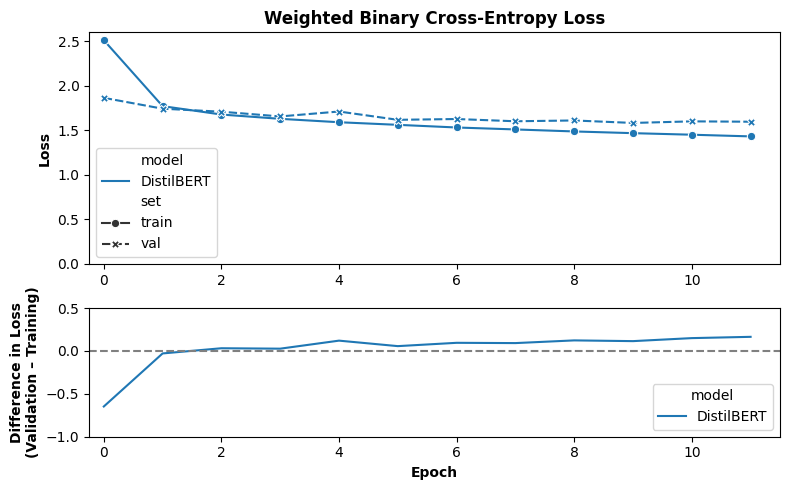

In [72]:
# | label: fig-loss-by-epoch
# | fig-cap: 'The change in weighted binary cross-entropy **loss** values by epoch.'
# | code-fold: true

n_epochs = epoch_performance_wide.epoch.max()

# Create subplots
fig, axes = plt.subplots(
    nrows=2, ncols=1, figsize=(8, 5), gridspec_kw={"height_ratios": [9, 5]}
)

# Plot the first line plot
sns.lineplot(
    data=epoch_performance,
    x="epoch",
    y="loss",
    hue="model",
    style="set",
    markers=True,
    ax=axes[0],
)
# axes[0].set_yscale('log')
axes[0].set_title("Weighted Binary Cross-Entropy Loss")
axes[0].set_xlim(-0.25, n_epochs + 0.5)
axes[0].set_ylim(0.0, 2.6)
axes[0].set_xlabel("")  # Remove x-axis title
axes[0].set_ylabel("Loss")

# Plot the second line plot
sns.lineplot(
    data=epoch_performance_wide,
    x="epoch",
    y="loss_diff",
    hue="model",
    markers=True,
    ax=axes[1],
)
axes[1].axhline(y=0, color="grey", linestyle="--")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Difference in Loss\n(Validation – Training)")
axes[1].set_xlim(-0.25, n_epochs + 0.5)
axes[1].set_ylim(-1.0, 0.5)

# Common

# Align y-axis labels
plt.tight_layout()
plt.show()

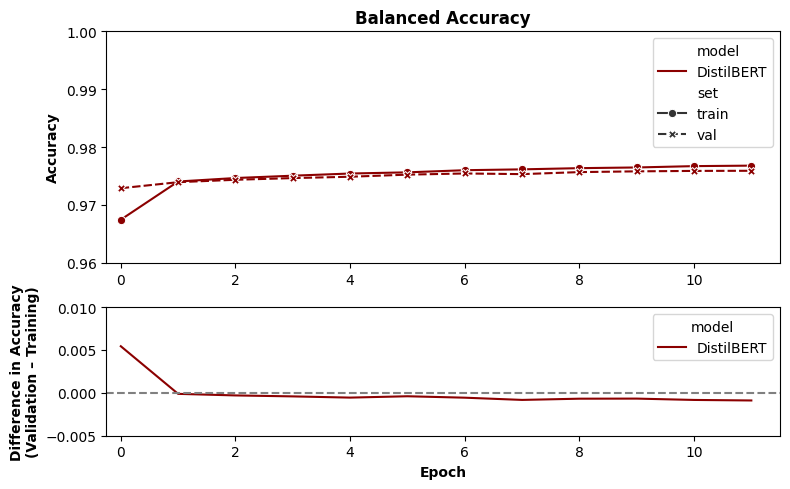

In [73]:
# | label: fig-bacc-by-epoch
# | fig-cap: 'The change in macro averaged balanced **accuracy** values by epoch.'
# | code-fold: true

n_epochs = epoch_performance_wide.epoch.max()

# Create subplots
fig, axes = plt.subplots(
    nrows=2, ncols=1, figsize=(8, 5), gridspec_kw={"height_ratios": [9, 5]}
)

# Plot the first line plot
sns.lineplot(
    data=epoch_performance,
    x="epoch",
    y="accuracy",
    hue="model",
    style="set",
    markers=True,
    palette=["darkred"],
    ax=axes[0],
)
axes[0].set_title("Balanced Accuracy")
axes[0].set_xlim(-0.25, n_epochs + 0.5)
axes[0].set_ylim(0.96, 1)
axes[0].set_xlabel("")  # Remove x-axis title
axes[0].set_ylabel("Accuracy")

# Plot the second line plot
sns.lineplot(
    data=epoch_performance_wide,
    x="epoch",
    y="accuracy_diff",
    hue="model",
    markers=True,
    palette=["darkred"],
    ax=axes[1],
)
axes[1].axhline(y=0, color="grey", linestyle="--")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Difference in Accuracy\n(Validation – Training)")
axes[1].set_xlim(-0.25, n_epochs + 0.5)
axes[1].set_ylim(-0.005, 0.010)

# Common
plt.tight_layout()
plt.show()

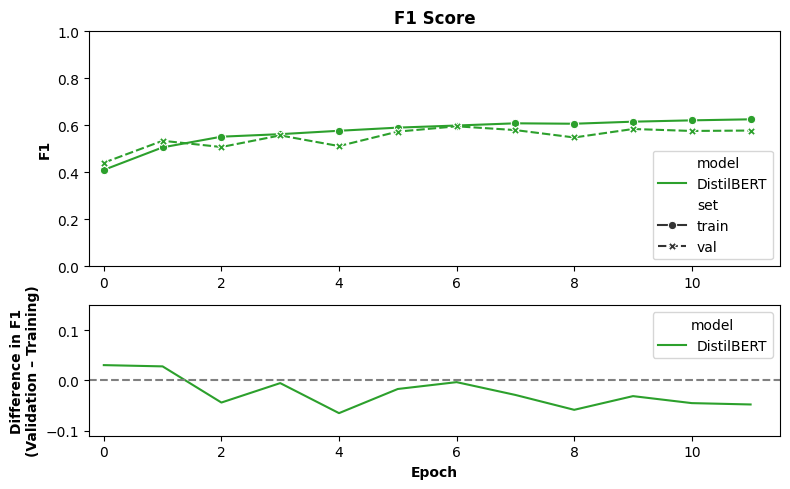

In [74]:
# | label: fig-f1-by-epoch
# | fig-cap: 'The change in macro averaged **F1** scores by epoch.'
# | code-fold: true

n_epochs = epoch_performance_wide.epoch.max()

# Create subplots
fig, axes = plt.subplots(
    nrows=2, ncols=1, figsize=(8, 5), gridspec_kw={"height_ratios": [9, 5]}
)

# Plot the first line plot
sns.lineplot(
    data=epoch_performance,
    x="epoch",
    y="f1",
    hue="model",
    style="set",
    markers=True,
    palette=["#2ca02c"],
    ax=axes[0],
)
axes[0].set_title("F1 Score")
axes[0].set_xlim(-0.25, n_epochs + 0.5)
axes[0].set_ylim(0, 1)
axes[0].set_xlabel("")  # Remove x-axis title
axes[0].set_ylabel("F1")

# Plot the second line plot
sns.lineplot(
    data=epoch_performance_wide,
    x="epoch",
    y="f1_diff",
    hue="model",
    markers=True,
    palette=["#2ca02c"],
    ax=axes[1],
)
axes[1].axhline(y=0, color="grey", linestyle="--")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Difference in F1\n(Validation – Training)")
axes[1].set_xlim(-0.25, n_epochs + 0.5)
axes[1].set_ylim(-0.11, 0.15)

# Common
plt.tight_layout()
plt.show()

<br>
<br>

Figures [-@fig-conf-mat-07-val]–[-@fig-conf-mat-10-val] show confusion matrices for multi-label classification of best-performing epochs. The images are exported from the TensorBoard log. Each matrix represents a single label, which is written above the matrix. Value `0` indicates absence and `1` indicates presence of the label.

![Confusion matrices for multi-label classification in **epoch 7** (validation). For details, refer description in the text.](logs/DistilBERT/version_0/tensorboard_logs/exported/confusion-mat--epoch-07-val.png){#fig-conf-mat-07-val width=400px}

<br>

![Confusion matrices for multi-label classification in **epoch 8** (validation). For details, refer description in the text.](logs/DistilBERT/version_0/tensorboard_logs/exported/confusion-mat--epoch-08-val.png){#fig-conf-mat-09-val width=400px}

<br>

![Confusion matrices for multi-label classification in **epoch 9** (validation), which indicates the **best** performance. For details, refer description in the text.](logs/DistilBERT/version_0/tensorboard_logs/exported/confusion-mat--epoch-09-val.png){#fig-conf-mat-09-val width=400px}

<br>

![Confusion matrices for multi-label classification in **epoch 10** (validation). For details, refer description in the text.](logs/DistilBERT/version_0/tensorboard_logs/exported/confusion-mat--epoch-10-val.png){#fig-conf-mat-10-val width=400px}

<br>

![Confusion matrices for multi-label classification in **epoch 11** (validation). For details, refer description in the text.](logs/DistilBERT/version_0/tensorboard_logs/exported/confusion-mat--epoch-11-val.png){#fig-conf-mat-11-val width=400px}

## Best Model Evaluation

::: {.callout-tip}
## Performed on Colab


<img src="https://colab.research.google.com/img/colab_favicon_256px.png" alt="Colab"  width="16" /> This section includes resource-intensive computations that were performed on **Google Colab** with NVIDIA *A100* GPU enabled.

<!-- <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Colab"/> -->

:::

In this section, the final model was evaluated on the **test set**. Compared to the validation set, the test set showed a slightly lower performance: (validation → test) weighted loss 1.583 → 1.977, macro-averaged balanced **accuracy** 0.976 → **0.964**, and macro-averaged **F1** score 0.584 → **0.551**. Smaller groups showed lower individual F1 score values (e.g., "threat" n=211, F1=0.367) compared to larger groups (e.g., "non-toxic" n=57,735, F1=0.956). Inference speed on powerful NVIDIA A100 GPU was approx 400 comments per second. More details are presented below.

Information on GPU used in this section:


```python
!nvidia-smi
```
```
Mon Mar 11 18:32:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0              40W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+----------------------+
                                                                                         
+---------------------------------------------------------------------------------------+
| Processes:                                                                            |
|  GPU   GI   CI        PID   Type   Process name                            GPU Memory |
|        ID   ID                                                             Usage      |
|=======================================================================================|
|  No running processes found                                                           |
+---------------------------------------------------------------------------------------+

```

The results are presented below.

In [61]:
# | code-summary: "Code: Load final model (Epoch 9) and create its trainer object"
# | code-fold: show

bert = ClassifierModule.load_from_checkpoint(
    "logs/DistilBERT/version_0/checkpoints/"
    "DistilBERT--epoch=009--step=79790--val_loss=1.58--val_accuracy=0.976.ckpt",
    model=model,
)

trainer_gpu = create_trainer("DistilBERT-final", profiler=None)

In [ ]:
# | code-summary: "Code: Evaluation on the validation set"
# | code-fold: true

with suppress_certain_logs_and_warnings():
    trainer_gpu.validate(model=bert, datamodule=data_module)

Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       val_accuracy        │    0.9758017659187317     │
│          val_f1           │    0.5844826698303223     │
│      val_loss_epoch       │    1.5825492143630981     │
└───────────────────────────┴───────────────────────────┘

In [ ]:
# | code-summary: "Code: Evaluation on the test set"
# | code-fold: true

with suppress_certain_logs_and_warnings():
    trainer_gpu.test(model=bert, datamodule=data_module)

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.9638603925704956     │
│          test_f1          │     0.551001787185669     │
│      test_loss_epoch      │    1.9768834114074707     │
└───────────────────────────┴───────────────────────────┘

In [ ]:
# | code-summary: "Code: Prediction on test set"
# | code-fold: true

with suppress_certain_logs_and_warnings():
    test_results = trainer_gpu.predict(model=bert, datamodule=data_module)

Predicting: |          | 0/? [00:00<?, ?it/s]

In Colab with NVIDIA A100 GPU, inference for 63,978 comments in 3999 batches took about 2 minutes and 30 seconds (approx. 400 comments per second).

![Inference speed on NVIDIA A100 GPU.](img/2024-03-12--04-30-58.png){#fig-inference-on-a100 width=800px}

In [ ]:
# | code-summary: "Code: Collect data from different batches"
# | code-fold: true

# Collect data from different batches
test_preds = []
test_targets = []

for batch_result in test_results:
    test_preds.extend(batch_result["pred"].tolist())
    test_targets.extend(batch_result["target"].tolist())

# As NumPy arrays
test_preds_np = np.array(test_preds)
test_targets_np = np.array(test_targets)

# As tensors
test_preds_pt = torch.tensor(test_preds_np)
test_targets_pt = torch.tensor(test_targets_np).int()

In [77]:
# | code-summary: "Code: Classification report for the test set"
# | code-fold: true
report = classification_report(
    test_targets_np,
    (test_preds_np > 0.5).astype(int),
    target_names=all_labels,
    digits=3,
    zero_division=0,
)
print(report)

               precision    recall  f1-score   support

    non_toxic      0.961     0.950     0.956     57735
        toxic      0.596     0.637     0.616      6090
 severe_toxic      0.416     0.330     0.368       367
      obscene      0.705     0.556     0.622      3691
       threat      0.596     0.265     0.367       211
       insult      0.714     0.443     0.547      3427
identity_hate      0.611     0.278     0.382       712

    micro avg      0.904     0.868     0.886     72233
    macro avg      0.657     0.494     0.551     72233
 weighted avg      0.899     0.868     0.880     72233
  samples avg      0.914     0.906     0.907     72233



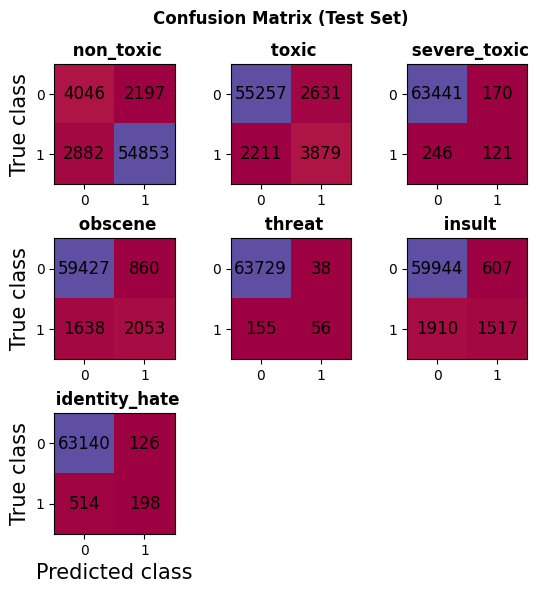

In [148]:
# | label: fig-confusion-matrix-test
# | fig-cap: "Confusion matrix for the test set."
# | code-fold: true

confusion_matrix = ConfusionMatrix(task="multilabel", num_labels=7, threshold=0.5)
confusion_matrix(test_preds_pt, test_targets_pt)

fig1, ax1 = confusion_matrix.plot(labels=all_labels)
fig1.set_size_inches(5.5, 5.5)
fig1.suptitle("Confusion Matrix (Test Set)", fontsize=12, y=1.05)
style_multilabel_confusion_matrix(ax1, label_font_size=12)

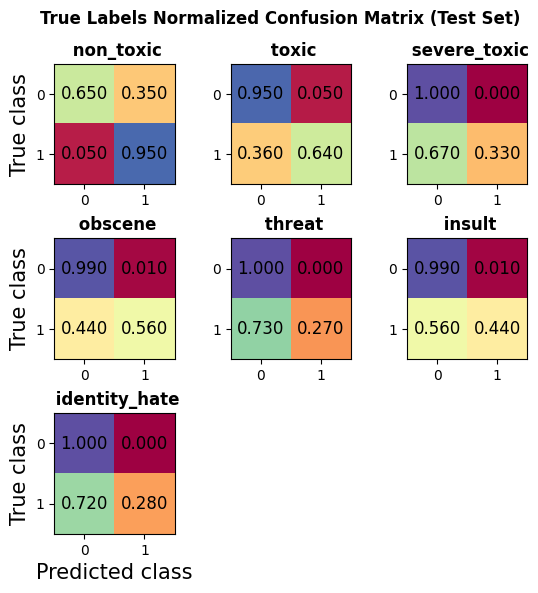

In [149]:
# | label: fig-confusion-matrix-test-true-norm
# | fig-cap: "True labels normalized confusion matrix for the test set."
# | code-fold: true

confusion_matrix_norm = ConfusionMatrix(
    task="multilabel", num_labels=7, threshold=0.5, normalize="true"
)
confusion_matrix_norm(test_preds_pt, test_targets_pt)

fig2, ax2 = confusion_matrix_norm.plot(labels=all_labels)
fig2.set_size_inches(5.5, 5.5)
fig2.suptitle("True Labels Normalized Confusion Matrix (Test Set)", fontsize=12, y=1.05)
style_multilabel_confusion_matrix(ax2, norm=True, precision=3, label_font_size=12)

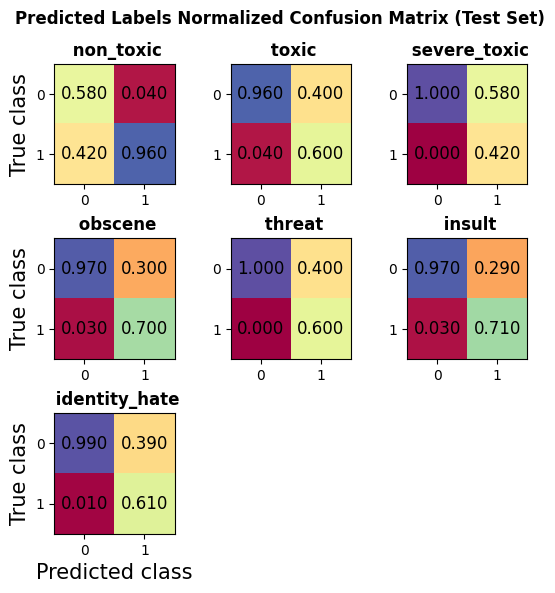

In [150]:
# | label: fig-confusion-matrix-test-pred-norm
# | fig-cap: "Predicted labels normalized confusion matrix for the test set."
# | code-fold: true

confusion_matrix_norm_pred = ConfusionMatrix(
    task="multilabel", num_labels=7, threshold=0.5, normalize="pred"
)
confusion_matrix_norm_pred(test_preds_pt, test_targets_pt)

fig3, ax3 = confusion_matrix_norm_pred.plot(labels=all_labels)
fig3.set_size_inches(5.5, 5.5)
fig3.suptitle(
    "Predicted Labels Normalized Confusion Matrix (Test Set)", fontsize=12, y=1.05
)
style_multilabel_confusion_matrix(ax3, norm=True, precision=3, label_font_size=12)

# Final Remarks {.unnumbered}

1. Hyperparameter tuning was not performed in this project but it might be beneficial to do so.
2. The project was performed on 2 different machines: local and Colab. It would be less confusing and more reproducible to perform the whole project on a single machine.
3. Several different models/model architectures (e.g., BERT, RoBERTa, etc.) could be tested to find the best one for this task.
4. Confusion matrices from the TensoBoard used the default settings and were not well formatted. Based on this fact, the confusion matrices for the test set were improved.